In [2]:
import keras
from keras import layers,utils
import numpy as np
import matplotlib.pyplot as plt

In [14]:
print("train data:")
train_dt=utils.image_dataset_from_directory(
    "cards_dataset/train_data",
    batch_size=32,
    image_size=(224,224),
    label_mode='categorical'
)

print("val data:")
val_dt=utils.image_dataset_from_directory(
    "cards_dataset/val_data",
    batch_size=32,
    image_size=(224,224),
    label_mode='categorical'
)

print("test data:")
test_dt=utils.image_dataset_from_directory(
    "cards_dataset/test_data",
    batch_size=32,
    image_size=(224,224),
    label_mode='categorical'
)

train data:
Found 7624 files belonging to 53 classes.
val data:
Found 265 files belonging to 53 classes.
test data:
Found 265 files belonging to 53 classes.


In [15]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),   
        layers.RandomRotation(0.15),      
        layers.RandomZoom(0.2),                         
        layers.RandomContrast(0.1),                     
        layers.RandomTranslation(0.1, 0.1)              
    ],
    name="data_augmentation"
)


In [16]:
input=keras.Input(shape=(224,224,3))
x=data_augmentation(input)
x=layers.Conv2D(32,(3,3),activation='relu')(input)
x=layers.BatchNormalization()(x)
x=layers.MaxPooling2D((2,2))(x)
x=layers.Dropout(0.25)(x)
x=layers.Conv2D(64,(3,3),activation='relu')(x)
x=layers.BatchNormalization()(x)
x=layers.MaxPooling2D((2,2))(x)
x=layers.Dropout(0.25)(x)
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001))(x)
x=layers.Dropout(0.5)(x)
output=layers.Dense(53,activation='softmax')(x)

model=keras.Model(input,output)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      1849

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_dt,epochs=70,validation_data=val_dt)

Epoch 1/70


239/239 [==============================] - 27s 111ms/step - loss: 2.3264 - accuracy: 0.3015 - val_loss: 2.4603 - val_accuracy: 0.1962
Epoch 2/70
239/239 [==============================] - 26s 110ms/step - loss: 2.2822 - accuracy: 0.3170 - val_loss: 2.1917 - val_accuracy: 0.3358
Epoch 3/70
239/239 [==============================] - 26s 110ms/step - loss: 2.2638 - accuracy: 0.3175 - val_loss: 2.2614 - val_accuracy: 0.3019
Epoch 4/70
239/239 [==============================] - 26s 110ms/step - loss: 2.2723 - accuracy: 0.3217 - val_loss: 2.3696 - val_accuracy: 0.2453
Epoch 5/70
239/239 [==============================] - 26s 109ms/step - loss: 2.2312 - accuracy: 0.3292 - val_loss: 2.2834 - val_accuracy: 0.3094
Epoch 6/70
239/239 [==============================] - 26s 108ms/step - loss: 2.2361 - accuracy: 0.3354 - val_loss: 2.4526 - val_accuracy: 0.2189
Epoch 7/70
239/239 [==============================] - 26s 108ms/step - loss: 2.2189 - accuracy: 0.3389 - val_loss: 2.2501 - val_accuracy: 0.2

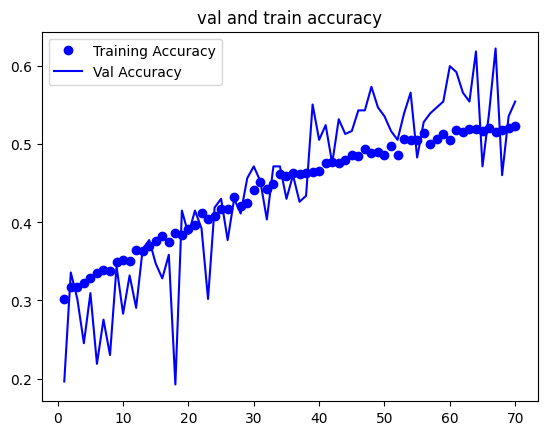

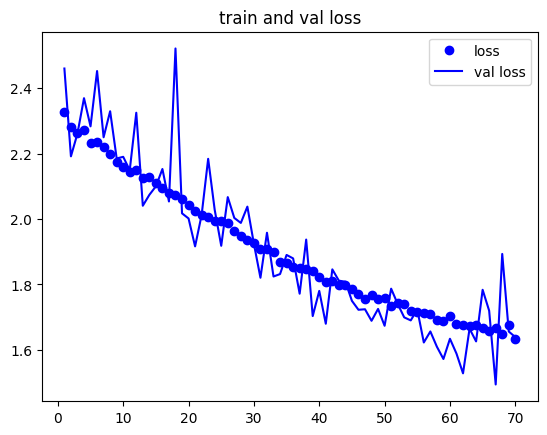

In [19]:
accuracy=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,'bo',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Val Accuracy")
plt.title("val and train accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label="loss")
plt.plot(epochs,val_loss,'b',label="val loss")
plt.title("train and val loss")
plt.legend()
plt.show()